In [3]:
from time import perf_counter

import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from lightdl import LightDataLoader, TensorDataLoader

In [4]:
# download and pre-load CIFAR10 to memory
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2

loader = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32)])
cifar = list(CIFAR10(r'E:\datasets\CIFAR10', transform = loader, download=False))

time_per_batch_size = {}

In [5]:
images = torch.stack([i[0] for i in cifar])
labels = torch.tensor([i[1] for i in cifar])

# z-normalize
images -= images.mean()
images /= images.std()

images.shape, labels.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

# torch.utils.data.TensorDataset with torch.utils.data.DataLoader

In [6]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(images, labels)

In [7]:
time_per_batch_size['pytorch DataLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_dataloader: pass
  time_per_batch_size['pytorch DataLoader'].append(perf_counter() - start)

print(time_per_batch_size['pytorch DataLoader'])

  0%|          | 0/128 [00:00<?, ?it/s]

100%|██████████| 128/128 [01:55<00:00,  1.11it/s]

[7.63617010001326, 1.4408057000255212, 1.179543400008697, 1.0593656999990344, 0.9446234999923036, 0.9788971000234596, 0.9257857000047807, 0.8142550000047777, 0.8208121999923605, 0.8232546999934129, 0.8271292000135873, 0.7979993000044487, 0.8021690999739803, 0.8066582000174094, 0.8091124000202399, 0.777034900005674, 0.775834699976258, 0.8008938000130001, 0.8046524999954272, 0.7987852999940515, 0.8225642000033986, 0.8020824000122957, 0.7932279999949969, 0.9972525999764912, 0.8285285000165459, 0.800284199998714, 0.8498881999985315, 0.799003599997377, 0.8090116000093985, 0.7967530000023544, 0.806626800011145, 0.8033348000026308, 0.7865115999884438, 0.9998516000050586, 0.8002078999998048, 0.7951905000081751, 0.8037604999844916, 0.7955622999870684, 0.787746000016341, 0.8048988000082318, 0.7784967999905348, 0.7924191000056453, 0.7881563999981154, 0.7764326999895275, 0.7945781000016723, 1.012491500005126, 0.7908545999962371, 0.8060279999917839, 0.8130565999890678, 0.798807899991516, 0.78856819

In [8]:
time_per_batch_size['pytorch DataLoader with pin_memory'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True, pin_memory = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['pytorch DataLoader with pin_memory'].append(perf_counter() - start)

print(time_per_batch_size['pytorch DataLoader with pin_memory'])

100%|██████████| 128/128 [02:29<00:00,  1.17s/it]

[12.778056299983291, 2.4851453000155743, 2.0548005999880843, 1.6891658999957144, 1.4518499000114389, 1.3602335000177845, 1.026582899998175, 1.0396727999905124, 1.027350899996236, 0.9728111000149511, 0.967612000007648, 0.9426663999911398, 0.9915772999811452, 0.9526988999859896, 0.9689229000068735, 0.9802007999969646, 0.9676620999816805, 0.9883162000041921, 0.9581725999887567, 0.9915468000108376, 1.1004573999962304, 0.9828228999977, 1.0869272999989334, 1.0150299999804702, 1.22964510001475, 0.9930202000250574, 0.9863849999965169, 1.034428899991326, 1.0144886999914888, 1.0575036000227556, 1.0197402999910992, 1.0388388999854214, 0.9913130000059027, 1.0038431000139099, 1.0321841000113636, 1.2467427999945357, 1.0297251000010874, 1.0145181999832857, 1.0042818999791052, 1.018112799996743, 1.015833700017538, 1.0270331999927294, 1.0354738000023644, 1.0816503000096418, 0.9783431999967434, 1.0265331999980845, 1.2714610999973956, 0.9773940999875776, 1.0444820999982767, 1.0840405999915674, 1.00610220

# TensorLoader

In [9]:
from tensorloader import TensorLoader
time_per_batch_size['TensorLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorLoader'].append(perf_counter() - start)

print(time_per_batch_size['TensorLoader'])

100%|██████████| 128/128 [00:21<00:00,  6.08it/s]

[0.8372207999927923, 0.2365196000027936, 0.18188160000136122, 0.1753342000010889, 0.17158809999818914, 0.16831909999018535, 0.16000039997743443, 0.16513080001459457, 0.15905990000464953, 0.1563474000140559, 0.15485799999441952, 0.21528989999205805, 0.1573997999948915, 0.15224789999774657, 0.15438900000299327, 0.15307930001290515, 0.15226080000866205, 0.15382659999886528, 0.1593394000083208, 0.14947509998455644, 0.14968319999752566, 0.15082450001500547, 0.15063089999603108, 0.1486029999796301, 0.15106920001562685, 0.1529502000194043, 0.15401359999668784, 0.15046309999888763, 0.152006899996195, 0.15428699998301454, 0.1512837999907788, 0.14927960000932217, 0.14911110000684857, 0.15503280001576059, 0.15163949999259785, 0.1494257000158541, 0.14796719999867491, 0.1566822000022512, 0.1481091000023298, 0.1476805999991484, 0.15259969999897294, 0.15399009999237023, 0.15394540000124834, 0.1784934000170324, 0.1960391000029631, 0.1683678000117652, 0.18778750000637956, 0.25516840000636876, 0.1705657

# LightDataLoader

In [10]:
time_per_batch_size['LightDataLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = LightDataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['LightDataLoader'].append(perf_counter() - start)

print(time_per_batch_size['LightDataLoader'])

100%|██████████| 128/128 [02:02<00:00,  1.05it/s]

[2.1306826999934856, 0.9538541000219993, 0.9354641000099946, 0.8289242000028025, 0.754142599995248, 0.7452993000042625, 0.7466544999915641, 0.7495253999950364, 0.7472517999995034, 0.7369188999873586, 0.733681899990188, 0.7126452999946196, 0.7026982999814209, 0.725845200009644, 0.7108819000131916, 0.7224290999874938, 0.8103757999779191, 0.9090799000114202, 0.7417830000049435, 0.8403999000147451, 0.7852559000020847, 0.7393982000066899, 0.7334892000071704, 0.7280089000123553, 0.7296099000086542, 0.7334257999900728, 0.8070168000122067, 0.8741330999764614, 0.7767899000027683, 0.8300887999939732, 0.7822435999987647, 0.772287600004347, 0.8754835000145249, 1.5441749999881722, 1.2065263999975286, 1.59744040001533, 1.3390570000046864, 1.5581932999775745, 1.5245500000019092, 1.4001960000023246, 0.9066537999897264, 1.305158000002848, 1.3276811999967322, 1.3351722999941558, 0.7699604000081308, 0.7543739999819081, 0.7769845000002533, 1.6102177000138909, 1.5780649999796879, 0.9925842999946326, 0.8513

# TensorDataLoader

In [11]:
time_per_batch_size['TensorDataLoader'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader'].append(perf_counter() - start)

print(time_per_batch_size['TensorDataLoader'])

100%|██████████| 128/128 [00:15<00:00,  8.03it/s]

[0.49704419999034144, 0.15933090000180528, 0.13058900000760332, 0.12411010000505485, 0.124153299984755, 0.12072509998688474, 0.1300531999731902, 0.1165927000110969, 0.11870469999848865, 0.11699229999794625, 0.12137549999170005, 0.1253209999995306, 0.11969630001112819, 0.11710370000218973, 0.11977640000986867, 0.1200881999975536, 0.11924719999660738, 0.11778279999271035, 0.11781759999576025, 0.12047649998567067, 0.12349950001225807, 0.12109169998439029, 0.11990779999177903, 0.12435589998494834, 0.12246740001137368, 0.12182850000681356, 0.11884499998996034, 0.1701007999945432, 0.1210072000103537, 0.13040139997610822, 0.12199949999921955, 0.12493600000743754, 0.1244470999808982, 0.11960320000071079, 0.1146057000150904, 0.11330820000148378, 0.11400879998109303, 0.11405020000529476, 0.11553479998838156, 0.1223440999747254, 0.11306519998470321, 0.11394209999707527, 0.1145791000162717, 0.1148391000169795, 0.11975529999472201, 0.11443090002285317, 0.11453489999985322, 0.11759169999277219, 0.11

In [13]:
time_per_batch_size['TensorDataLoader memory_efficient'] = []

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True, memory_efficient=True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader memory_efficient'].append(perf_counter() - start)

print(time_per_batch_size['TensorDataLoader memory_efficient'])

100%|██████████| 128/128 [00:24<00:00,  5.29it/s]

[2.6079386999772396, 0.5251561000186484, 0.28084409999428317, 0.2257330000284128, 0.20020049999584444, 0.1835480000008829, 0.2008948999864515, 0.16658030002145097, 0.16744180000387132, 0.23549190000630915, 0.14878950000274926, 0.15076449999469332, 0.17563899999368005, 0.14404570002807304, 0.15006980000180192, 0.14555830002063885, 0.1733564000169281, 0.13504100000136532, 0.13829810000606813, 0.14716360002057627, 0.14214650000212714, 0.14239379999344237, 0.14045889998669736, 0.17211909999605268, 0.15125749999424443, 0.1499591000028886, 0.16092829999979585, 0.16370600002119318, 0.16171400001621805, 0.16220009999233298, 0.19146240002010018, 0.1681129000207875, 0.16747139999642968, 0.17792570000165142, 0.15555569998105057, 0.1613307999796234, 0.1647291999834124, 0.17793150001671165, 0.16602140001486987, 0.16280469999765046, 0.16433770000003278, 0.16645910000079311, 0.16543319998891093, 0.15808130000368692, 0.18747089998214506, 0.25459590001264587, 0.1596389000187628, 0.17716369999106973, 0.

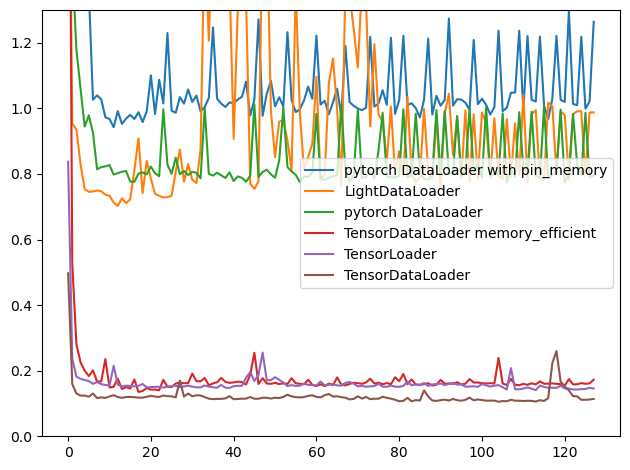

In [15]:
import numpy as np

time_per_batch_size_t = sorted(time_per_batch_size.items(), key = lambda x: np.mean(x[1]), reverse = True)

for key, vals in time_per_batch_size_t:
  plt.plot(vals, label = key)

plt.legend()
plt.ylim(0, 1.3)
plt.tight_layout()
plt.show()